## *Statistics coded:* Living conditions in Europe - poverty and social exclusion

Prepared by [**Lasai Barreñada**](https://github.com/LasaiBarrenada) (EMOS).

This notebook aims at illustrating the *Statistics Expplained* article on [Living conditions in Europe - poverty and social exclusion](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Living_conditions_in_Europe_-_poverty_and_social_exclusion).


### Settings

The libraries needed for this notebook are the following ones:

In [1]:
import numpy as np
from eurostatapiclient import EurostatAPIClient
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


### Documentation:
- [**Numpy**](https://numpy.org/)
- [**EurostatApiClient**](https://pypi.org/project/eurostatapiclient/)
- [**Matplotlib**](https://matplotlib.org/contents.html)
- [**Seaborn**](https://seaborn.pydata.org/)

#### Set up eurostatapiclinet by supplying settings, which will stay the same throught

In [2]:
#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [3]:
def setvaluegraph (value #list of the values 
                   ,axis #Axis where we represent the value
                   , horizontal #True if the graph is horizontal and False if it's vertical 
                   ,xpos = 0 # Parameter to adjust the position of the value on x axis
                   ,ypos= 0 # Parameter to adjust the position of the value on y axis
                   , fontsize= 8
                   , color = 'b'
                   , weight = 'normal'
                   , style = 'normal'
                   , form = '{}'): #Format of the desired value e.g {:.1f}% for pcg
    if horizontal:
         for i,v in enumerate(value):
             axis.text(v-xpos,i-ypos,str(form.format(v)), fontsize = fontsize, color = color, weight = weight, style = style)
    else:
        for i,v in enumerate(value):
            axis.text(i-xpos,v-ypos,str(form.format(v)), fontsize = fontsize, color = color, weight = weight, style = style)
# This function allows to set the value of the represented graph

### Poverty and social exclusion

#### Figure 1

Text(0.3, 1, 'People at risk of porverty or social exclusion in EU, 2008-2018 \n (in million persons and % of total population, 2020 data)')

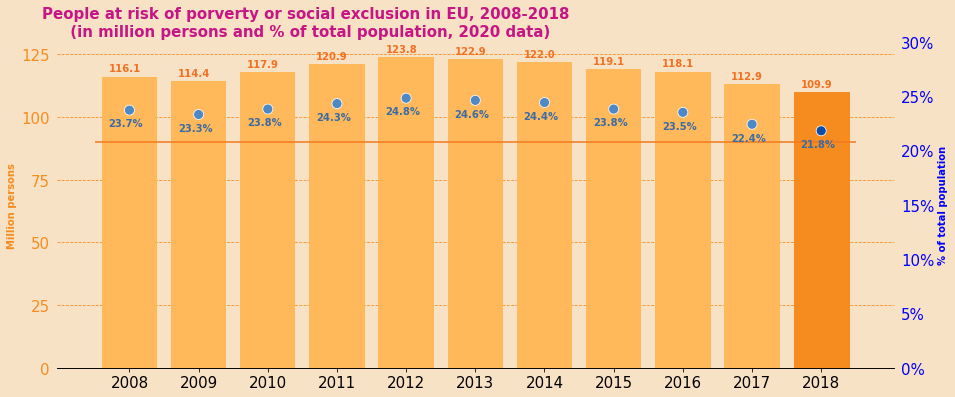

In [4]:
#We define params of dataframes
params_df1_ths_per = {
    'AGE': 'TOTAL',
    'sinceTimePeriod': '2008',
    'sex': 'T',
    'geo':'EU',
    'unit':'THS_PER'
} 
params_df1_pc = {
    'AGE': 'TOTAL',
    'sinceTimePeriod': '2008',
    'sex': 'T',
    'geo':'EU',
    'unit':'PC'
} 
# We retrieve the info with the EurostatApiClient
dataframe_1_ths_per = client.get_dataset('ilc_peps01', params=params_df1_ths_per).to_dataframe()
dataframe_1_pc = client.get_dataset('ilc_peps01', params=params_df1_pc).to_dataframe()
params_df1_ths_per.update({'lastTimePeriod': '2018'})
dataframe_1_ths_per = dataframe_1_ths_per[dataframe_1_ths_per.time <= params_df1_ths_per['lastTimePeriod']]
params_df1_pc.update({'lastTimePeriod': '2018'})
dataframe_1_pc = dataframe_1_pc[dataframe_1_pc.time <= params_df1_pc['lastTimePeriod']]
dataframe_1_ths_per = dataframe_1_ths_per.pivot(index='time', columns='age', values='values').reset_index()
dataframe_1_pc = dataframe_1_pc.pivot(index='time', columns='age', values='values').reset_index()

values = dataframe_1_ths_per['TOTAL']

fig = plt.figure(facecolor='#f8e2c5', figsize = (15,6)) #We create the figure
ax=fig.add_subplot(facecolor='#f8e2c5')

barplot =ax.bar(dataframe_1_ths_per['time'],dataframe_1_ths_per['TOTAL']/1000, color=('#ffb95a')) #We draw the barplot with the first dataframe
barplot[10].set_color('#f68c1f') #Highlight the 10th bar

axes1 = plt.gca() 
axes2 = axes1.twinx() #We create the secondary axis with twinx
scatterplot= sns.scatterplot(x=dataframe_1_pc['time'], #We draw the scatterplot and specify the arguments
                             y = dataframe_1_pc['TOTAL'],
                             hue= dataframe_1_pc['time'],
                             ax=axes2 ,
                             s = 100 ,
                             palette=['#4f89c5','#4f89c5','#4f89c5','#4f89c5','#4f89c5','#4f89c5','#4f89c5','#4f89c5','#4f89c5','#4f89c5','#0b4dab'],
                             legend = False)
# We set the ticks of both axis
axes2.set_yticks(range(0,31,5))
axes1.set_yticks(range(0,151,25))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks =  mtick.FormatStrFormatter(fmt)
axes2.yaxis.set_major_formatter(yticks) #We set the ticks of the right axis in percentage
ax.tick_params(axis = "y", which = "both", bottom = False, top = False, left = False, right=False, colors = '#f68c1f' , labelsize = 15)
ax.tick_params(axis ='x', which = 'both', labelsize = 15)
axes2.tick_params(axis='y',right=False, colors = 'b', labelsize = 15)
ax.yaxis.label.set_color('#f68c1f')
ax.set_ylabel('Million persons', weight = 'bold')
axes2.yaxis.label.set_color('b')
axes2.set_ylabel('% of total population' , weight = 'bold')
ax.set_axisbelow(True)

ax.hlines(values[10]/1000-20,-0.5,10.5, colors='#f2771e') #Horizontal line with the last value minus 20 million

#Set the values in the graph with the function defined above
setvaluegraph(round(dataframe_1_ths_per['TOTAL']/1000,1),ax,False,0.3,-2,10,color='#f37020',weight='bold')
setvaluegraph(dataframe_1_pc['TOTAL'],axes2,False,0.3,1.5,10,color='#3b6ba3',weight = 'bold', form ='{:.1f}%' )

ax.grid(True, which = 'major', axis = 'y' , color ='#f68c1f', linestyle = '--' )
sns.despine(top=True, right=True, left=True, bottom=False)

ax.set_title('People at risk of porverty or social exclusion in {}, {}-{} \n (in million persons and % of total population, 2020 data)'.format(params_df1_ths_per['geo'],params_df1_ths_per['sinceTimePeriod'],params_df1_ths_per['lastTimePeriod']),
             fontsize=15,fontweight='bold',y=1, x=0.3, c = 'mediumvioletred')


![Figure 1: People at risk of poverty or social exclusion, 2008-2018(EU-28, million persons)](https://ec.europa.eu/eurostat/statistics-explained/images/f/fe/People_at_risk_of_poverty_or_social_exclusion%2C_2008-2018_2.jpeg)

Figure 1: People at risk of poverty or social exclusion, 2008-2018 (EU-28, million persons)

Source: Eurostat ([ilc_peps01](https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-127829_QID_109B0E0E_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;AGE,L,Z,1;SEX,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-127829UNIT,PC;DS-127829AGE,Y16-29;DS-127829SEX,T;DS-127829INDICATORS,OBS_FLAG;&rankName1=UNIT_1_2_-1_2&rankName2=AGE_1_2_-1_2&rankName3=INDICATORS_1_2_-1_2&rankName4=SEX_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23,%23%23%23.%23%23%23&lang=en))



 # **Figure 2**
![Figure 2: People at risk of poverty or social exclusion by socio-economic characteristic, 2018](https://ec.europa.eu/eurostat/statistics-explained/images/8/80/People_at_risk_of_poverty_or_social_exclusion_by_socio-economic_characteristic%2C_2018_3.png)

Figure 2: People at risk of poverty or social exclusion by socio-economic characteristic, 2018
(% share of the total population)

Source: Eurostat ([ilc_peps01](https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-127829_QID_109B0E0E_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;AGE,L,Z,1;SEX,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-127829UNIT,PC;DS-127829AGE,Y16-29;DS-127829SEX,T;DS-127829INDICATORS,OBS_FLAG;&rankName1=UNIT_1_2_-1_2&rankName2=AGE_1_2_-1_2&rankName3=INDICATORS_1_2_-1_2&rankName4=SEX_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23,%23%23%23.%23%23%23&lang=en))
, ([ilc_peps02](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_peps02&lang=en))
 and ([ilc_peps04](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_peps04&lang=en))

In [5]:
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)


Text(13.5, 65, 'Activity status')

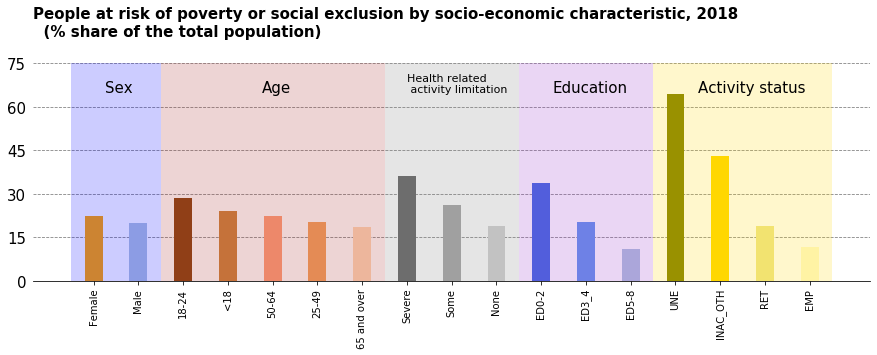

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 29 10:06:18 2020

@author: Lasai
"""



import numpy as np
from eurostatapiclient import EurostatAPIClient
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)





dataframe_2_sex_query = 'ilc_peps01?precision=2&sex=F&sex=M&geo=EU&unit=PC&unitLabel=code&time=2018&age=Y_GE18'
dataframe_2_age_query = 'ilc_peps01?precision=1&sex=T&geo=EU&unit=PC&unitLabel=code&time=2018&age=Y18-24&age=Y25-49&age=Y50-64&age=Y_GE65&age=Y_LT18'
dataframe_2_lim_query = 'hlth_dpe010?sex=T&precision=1&lev_limit=NONE&lev_limit=SEV&lev_limit=SOME&geo=EU&unit=PC&time=2018&age=Y_GE16'
dataframe_2_activity_query = 'ilc_peps02?precision=1&sex=T&geo=EU&wstatus=EMP&wstatus=INAC_OTH&wstatus=RET&wstatus=UNE&time=2018&age=Y_GE18'
dataframe_2_education_query = 'ilc_peps04?precision=1&sex=T&geo=EU&isced11=ED0-2&isced11=ED3_4&isced11=ED5-8&time=2018&age=Y_GE18'


dataframe_2_sex = client.get_dataset(dataframe_2_sex_query).to_dataframe().sort_values(by = ['values'],ascending = False).replace(to_replace = ['F','M'], value = ['Female','Male'] )
dataframe_2_age =client.get_dataset(dataframe_2_age_query).to_dataframe().sort_values(by = ['values'],ascending = False).replace(to_replace = ['Y18-24','Y_LT18','Y50-64','Y25-49','Y_GE65'],value = ['18-24','<18','50-64','25-49','65 and over'])
dataframe_2_lim =client.get_dataset(dataframe_2_lim_query).to_dataframe().sort_values(by = ['values'],ascending = False).replace(to_replace = ['SEV','SOME','NONE'], value = ['Severe','Some', 'None'])
dataframe_2_activity =client.get_dataset(dataframe_2_activity_query).to_dataframe().sort_values(by = ['values'],ascending = False).replace(to_replace = ['ED0-2','ED3_4','ED5-8'],value = ['Low','Medium','High'])
dataframe_2_education =client.get_dataset(dataframe_2_education_query).to_dataframe().sort_values(by = ['values'],ascending = False).replace(to_replace = ['UNE','INAC_OTH','RET','EMP'], value = ['Unemployed','Other inactive','Retired','Employed'])


fig, ax = plt.subplots(figsize=(15, 4))

bar_sex = plt.bar(dataframe_2_sex['sex'],dataframe_2_sex['values'], color = ['orange','lightsteelblue'], width = 0.4 )
bar_age = plt.bar(dataframe_2_age['age'],dataframe_2_age['values'], color =['saddlebrown','peru','lightsalmon', 'sandybrown','peachpuff'], width = 0.4  )
bar_lim = plt.bar(dataframe_2_lim['lev_limit'],dataframe_2_lim['values'], color = ['dimgray','darkgray','lightgray'], width = 0.4 )
bar_education = plt.bar(dataframe_2_education['isced11'],dataframe_2_education['values'], color = ['royalblue','cornflowerblue','lightsteelblue'], width = 0.4 )
bar_activity = plt.bar(dataframe_2_activity['wstatus'],dataframe_2_activity['values'], color = ['olive','gold','khaki','lemonchiffon'], width = 0.4 )

ax.set_yticks(range(0,76,15))
ax.tick_params(axis = "y", which = "both", bottom = False, top = False, left = False, right=False, labelsize = 15)
sns.despine(top=True, right=True, left=True, bottom=False)
ax.grid(True, which = 'major', axis = 'y' , color ='grey', linestyle = '--')
ax.set_axisbelow(True)
plt.xticks(rotation= 90)

ax.set_title('People at risk of poverty or social exclusion by socio-economic characteristic, 2018 \n  (% share of the total population)' 
             , fontsize=15,fontweight='bold', horizontalalignment = 'left', x = 0, y =1.1)


plt.axvspan(-.5, 1+.5, facecolor='b', alpha=0.2)
plt.axvspan(1.5,6.5, facecolor='brown', alpha=0.2)
plt.axvspan(6.5,9.5, facecolor='grey', alpha=0.2)
plt.axvspan(9.5,12.5, facecolor='darkorchid', alpha=0.2)
plt.axvspan(12.5, 16.5, facecolor='gold', alpha=0.2)
plt.text( 0.25,65,'Sex', fontsize=15)
plt.text(3.75,65,'Age', fontsize=15)
plt.text(7,65,'Health related \n activity limitation', fontsize=11)
plt.text( 10.25,65,'Education', fontsize=15)
plt.text( 13.5,65,'Activity status', fontsize=15)


 # **Figure 3**
![Figure 3: People at risk of poverty or social exclusion by degree of urbanisation, 2018
(% share of the total population)](https://ec.europa.eu/eurostat/statistics-explained/images/2/26/People_at_risk_of_poverty_or_social_exclusion_by_degree_of_urbanisation%2C_2018_2.png)
Figure 3: People at risk of poverty or social exclusion by degree of urbanisation, 2018
(% share of the total population)

Source: Eurostat ([ilc_peps01](https://appsso.eurostat.ec.europa.eu/nui/show.do?query=BOOKMARK_DS-127829_QID_109B0E0E_UID_-3F171EB0&layout=TIME,C,X,0;GEO,L,Y,0;UNIT,L,Z,0;AGE,L,Z,1;SEX,L,Z,2;INDICATORS,C,Z,3;&zSelection=DS-127829UNIT,PC;DS-127829AGE,Y16-29;DS-127829SEX,T;DS-127829INDICATORS,OBS_FLAG;&rankName1=UNIT_1_2_-1_2&rankName2=AGE_1_2_-1_2&rankName3=INDICATORS_1_2_-1_2&rankName4=SEX_1_2_-1_2&rankName5=TIME_1_0_0_0&rankName6=GEO_1_2_0_1&sortC=ASC_-1_FIRST&rStp=&cStp=&rDCh=&cDCh=&rDM=true&cDM=true&footnes=false&empty=false&wai=false&time_mode=ROLLING&time_most_recent=false&lang=EN&cfo=%23%23%23,%23%23%23.%23%23%23&lang=en)) and ([ilc_peps13](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_peps13&lang=en))

# **Figure 4**
![Figure 4: People at risk of poverty or social exclusion by type of risk, EU-28, 2018 (million persons)](https://ec.europa.eu/eurostat/statistics-explained/images/3/3d/People_at_risk_of_poverty_or_social_exclusion_by_type_of_risk%2C_EU-28%2C_2018_3.png)

Figure 4: People at risk of poverty or social exclusion by type of risk, EU-28, 2018 (million persons)

Source: Eurostat ([ilc_pees01](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_pees01&lang=en))

# **Figure 5**
![Figure 5: People at risk of poverty or social exclusion by type of risk, 2018(% share of the total population)
](https://ec.europa.eu/eurostat/statistics-explained/images/4/4a/People_at_risk_of_poverty_or_social_exclusion_by_type_of_risk%2C_2018_2.png)
Figure 5: People at risk of poverty or social exclusion by type of risk, 2018(% share of the total population)

Source: Eurostat ([ilc_li02](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li02&lang=en)) and ([ilc_pees01](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_pees01&lang=en))
# **Figure 6**
![Figure 6: At-risk-of-poverty rate and at-risk-of-poverty threshold, 2018 (% / thousand PPS)
](https://ec.europa.eu/eurostat/statistics-explained/images/e/ec/At-risk-of-poverty_rate_and_at-risk-of-poverty_threshold%2C_2018.png)
Figure 6: At-risk-of-poverty rate and at-risk-of-poverty threshold, 2018 (% / thousand PPS)

Source: Eurostat ([ilc_li02](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li02&lang=en)) and ([ilc_li01](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li01&lang=en))
# **Figure 7**
![Figure 7: At-risk-of-poverty rate - before and after - deducting housing costs, 2018 (% share of total population)](https://ec.europa.eu/eurostat/statistics-explained/images/0/05/At-risk-of-poverty_rate_-_before_and_after_-_deducting_housing_costs%2C_2018.png)
Figure 7: At-risk-of-poverty rate - before and after - deducting housing costs, 2018 (% share of total population)
Source: Eurostat ([ilc_li02](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li02&lang=en)) and ([ilc_li48](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li48&lang=en))
# **Figure 8**
![Figure 8: At-risk-of-poverty rate - before and after - social transfers, 2018 (% share of total population)
](https://ec.europa.eu/eurostat/statistics-explained/images/f/fe/At-risk-of-poverty_rate_-_before_and_after_-_social_transfers%2C_2018.png)
Figure 8: At-risk-of-poverty rate - before and after - social transfers, 2018 (% share of total population)
Source: Eurostat ([ilc_li02](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li02&lang=en)) and ([ilc_li10](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li10&lang=en))

# **Map 1**
![Map 1: At-risk-of-poverty rate anchored in 2008, 2008-2018 (percentage points difference, 2018 minus 2008)
](https://ec.europa.eu/eurostat/statistics-explained/images/7/7a/AROPE_2019_map1-1.png)

Map 1: At-risk-of-poverty rate anchored in 2008, 2008-2018 (percentage points difference, 2018 minus 2008)

Source: Eurostat ([ilc_li22b](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=ilc_li22b&lang=en))

### Additional material

At this stage, it is up to you to extend the work presented in the notebook with further analysis/visualisation you deem relevant. 